In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAV project/Global YouTube Statistics.csv", encoding='latin')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## List of all colums available

In [6]:
collist=df.columns
print(*collist, sep='\n')

rank
Youtuber
subscribers
video views
category
Title
uploads
Country
Abbreviation
channel_type
video_views_rank
country_rank
channel_type_rank
video_views_for_the_last_30_days
lowest_monthly_earnings
highest_monthly_earnings
lowest_yearly_earnings
highest_yearly_earnings
subscribers_for_last_30_days
created_year
created_month
created_date
Gross tertiary education enrollment (%)
Population
Unemployment rate
Urban_population
Latitude
Longitude


In [7]:
#df.drop(columns=['Gross tertiary education enrollment (%)',
#                 'Unemployment rate',
#                 'Urban_population',
#                'Latitude',
#                'Longitude',
#                'video_views_for_the_last_30_days',
#                'video_views_for_the_last_30_days'], inplace=True)

In [8]:
#df

## Converting Video View Column data type to numeric

> the video view count data is converted to numeric type, with precision upto 0.1 decimal places.
***
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.
If it’s a note, you don’t have to include the word “Note”.
</div>

In [9]:
df['video views'] = pd.to_numeric(df['video views'], errors='coerce')
#plt.boxplot(df["video views"])
pd.options.display.float_format = '{:.1f}'.format

In [10]:
#plt.figure(figsize=(12, 6))
#sns.countplot(x='category', data=df)
#plt.xticks(rotation=45, ha='right')
#plt.title('Number of Videos in Each Category')
#plt.show()

# Check for outliers.
<p><b> We will check for presence of any outlier in video view counts, subscribers counts and channel creation year.
    To indicate and correct any errors in the data.

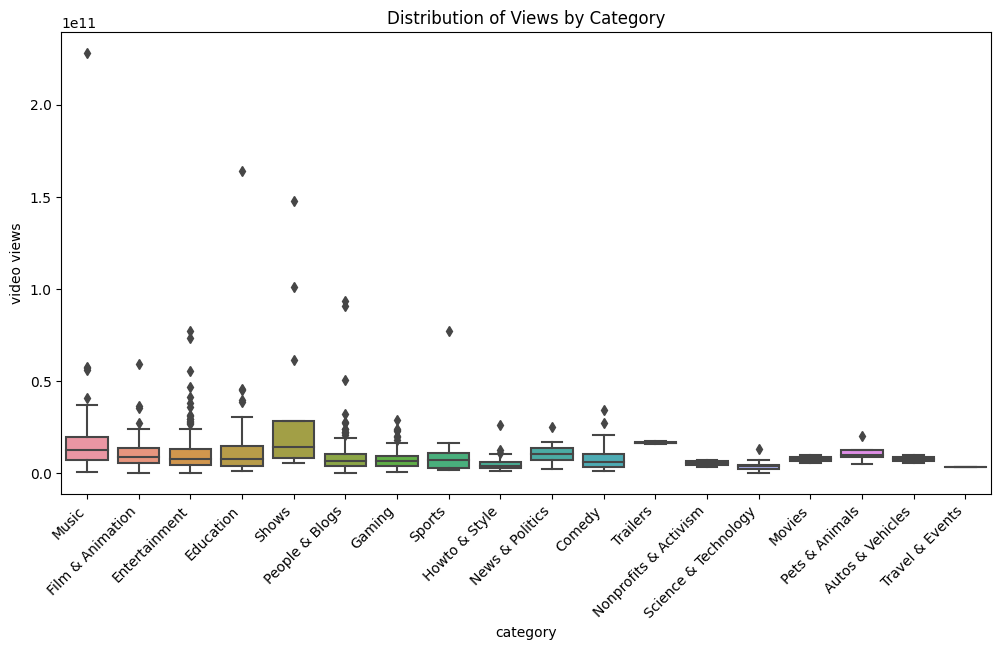

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category',y='video views', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Views by Category')
plt.show()


### We see a prominent outlier data point for muic category.
<P><b> Let's analyse if it is a genuine data record or an outlier. We will check for its corresponding row in dataframe

In [12]:
music=df[df['category']=='Music']
music[music['video views']==music['video views'].max()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000.0,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2258000000.0,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1366417754.0,5.4,471031528.0,20.6,79.0


<br><p> The data point corresponds to <i> T-Series</i> which is actually a prominent channel with authentic view. The channel was also started in 2006, which is pretty old for such a big view count

### We see another outlier data point for education category.
<P><b> Let's analyse if it is a genuine data record or an outlier. We will check for its corresponding row in dataframe

In [13]:
edu=df[df['category']=='Education']
edu[edu['video views']==edu['video views'].max()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000.0,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1975000000.0,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,328239523.0,14.7,270663028.0,37.1,-95.7


<p><b> It is COCOMELON channel, which is also a very famous channel with around 1000 uploads and creation date in 2006. deeming it to be genuine.

## Similarly checking for other datapoints

In [14]:
vlog=df[df['category']=='Shows']
vlog[vlog['video views']>100000][:3]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
4,5,SET India,159000000,148000000000.0,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1824000000.0,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1366417754.0,5.4,471031528.0,20.6,79.0
15,16,Sony SAB,83000000,101000000000.0,Shows,Sony SAB,71270,India,IN,Entertainment,4.0,5.0,7.0,1657000000.0,414300.0,6600000.0,5000000.0,79600000.0,1100000.0,2007.0,Aug,4.0,28.1,1366417754.0,5.4,471031528.0,20.6,79.0
26,27,Colors TV,64600000,61510906457.0,Shows,Colors TV,112915,India,IN,Entertainment,10.0,9.0,9.0,1188000000.0,296900.0,4800000.0,3600000.0,57000000.0,1100000.0,2008.0,Jun,13.0,28.1,1366417754.0,5.4,471031528.0,20.6,79.0


In [15]:
vlog=df[df['category']=='People & Blogs']
vlog[vlog['video views']>50000][:3]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
6,7,ýýý Kids Diana Show,112000000,93247040539.0,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,731674000.0,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,328239523.0,14.7,270663028.0,37.1,-95.7
8,9,Like Nastya,106000000,90479060027.0,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,48947000.0,12200.0,195800.0,146800.0,2300000.0,100000.0,2016.0,Jan,14.0,81.9,144373535.0,4.6,107683889.0,61.5,105.3
13,14,BLACKPINK,89800000,32144597566.0,People & Blogs,BLACKPINK,543,South Korea,KR,Music,32.0,1.0,3.0,498930000.0,124700.0,2000000.0,1500000.0,23900000.0,700000.0,2016.0,Jun,29.0,94.3,51709098.0,4.2,42106719.0,35.9,127.8


## Hence, we observe there is no such outlier in the data.
> Data is collected correctly.

# Checking for null values

In [16]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [17]:
df[df['subscribers_for_last_30_days'].isnull()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.1,0.0,0.6,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.1,-95.7
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,93247040539.0,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,731674000.0,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,328239523.0,14.7,270663028.0,37.1,-95.7
7,8,PewDiePie,111000000,29058044447.0,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,39184000.0,9800.0,156700.0,117600.0,1900000.0,NaN,2010.0,Apr,29.0,63.2,126226568.0,2.3,115782416.0,36.2,138.3
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,982,Pari's Lifestyle,12400000,7741764747.0,People & Blogs,Pari's Lifestyle,459,India,IN,People,702.0,124.0,63.0,38165000.0,9500.0,152700.0,114500.0,1800000.0,NaN,2018.0,Nov,26.0,28.1,1366417754.0,5.4,471031528.0,20.6,79.0
982,983,DisneyChannelUK,12400000,12607488647.0,Music,DisneyChannelUK,4422,United Kingdom,GB,Entertainment,306.0,34.0,172.0,34758000.0,8700.0,139000.0,104300.0,1700000.0,NaN,2007.0,Dec,6.0,60.0,66834405.0,3.9,55908316.0,55.4,-3.4
985,986,TKOR,12400000,3392022527.0,Education,TKoR,0,NaN,NaN,People,4057944.0,NaN,7741.0,NaN,0.0,0.0,0.0,0.0,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,13959586308.0,People & Blogs,annakova,1,NaN,NaN,Film,4049634.0,NaN,5307.0,2.0,0.0,0.0,0.0,0.1,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df['subscribers_for_last_30_days']=df['subscribers_for_last_30_days'].fillna('not available')

In [19]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 5
created_month                                5
created_date 

## We observe that this missing data can't be interpolated to fill
So, we can drop the records missing the Category label

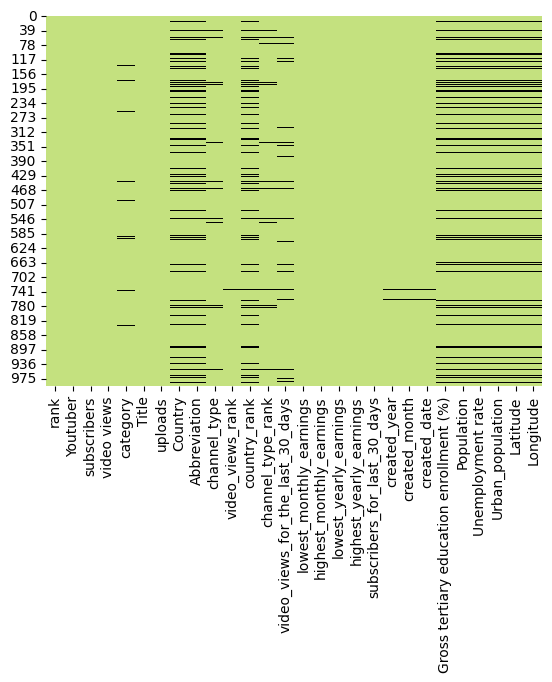

In [20]:
pastel_palette = sns.color_palette(['#C4E17F', 'black'], as_cmap=True)
sns.heatmap(df.isnull(), cbar=False, cmap=pastel_palette)
plt.show()

In [21]:
df.dropna(subset=['category'], inplace=True)

In [22]:
df[['channel_type','Country','Abbreviation']]=df[['channel_type','Country','Abbreviation']].fillna('not available')

In [23]:
df[['Gross tertiary education enrollment (%)','Population','Unemployment rate','Urban_population']]=df[['Gross tertiary education enrollment (%)','Population','Unemployment rate','Urban_population']].fillna('not available')

In [24]:
df.isnull().sum()


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             1
country_rank                               109
channel_type_rank                           29
video_views_for_the_last_30_days            50
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 5
created_month                                5
created_date 

# Checking for duplicate Data

In [25]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
989    False
990    False
991    False
993    False
994    False
Length: 949, dtype: bool

In [26]:
df[df.duplicated()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


> hence, there are no duplicate data

# Checking Data types of Columns

In [27]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days                object
created_year                   

In [28]:
df[['Youtuber','category','Title','Country','Abbreviation','channel_type']] = df[['Youtuber','category','Title','Country','Abbreviation','channel_type']].astype('string')

In [32]:
df.dropna(subset=['created_year','created_month','created_date'], inplace=True)

In [33]:
from datetime import datetime

In [34]:
df['created_year'] = df['created_year'].astype(int)
df['created_date'] = df['created_date'].astype(int)
df['created_month'] = df['created_month'].astype(str)

In [35]:
df['date'] = pd.to_datetime(df['created_date'].astype('str') + df['created_month'] + df['created_year'].astype('str'), format='%d%b%Y')


In [36]:
df['date']

0     2006-03-13
1     2006-03-05
2     2012-02-20
3     2006-09-01
4     2006-09-20
         ...    
989   2012-01-17
990   2017-02-12
991   2018-09-14
993   2012-05-09
994   2017-08-01
Name: date, Length: 944, dtype: datetime64[ns]

In [37]:
df[df['created_year']<2005]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,date
101,102,YouTube,36300000,3010784935.0,News & Politics,YouTube,744,United States,US,Entertainment,2860.0,32.0,5.0,21103000.0,5300.0,84400.0,63300.0,1000000.0,300000.0,1970,Jan,1,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,1970-01-01


# since we know youtube was launched in 2005, and this record has creation year as 1970
### We will drop it

In [38]:
df.drop(101, inplace=True)

## checking again

In [39]:
df['created_year'].unique()

array([2006, 2012, 2015, 2010, 2016, 2018, 2014, 2007, 2020, 2008, 2005,
       2011, 2013, 2009, 2017, 2021, 2019, 2022])

# checking for accounts with zero views

In [40]:
zero_views = df[df['video views'] == 0]
zero_views

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,date
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.1,0.0,0.6,not available,2006,Mar,5,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,2006-03-05


## so for the purpose of analysis we will remove these channel

In [41]:
df.drop(2 , inplace=True)

In [42]:
df.shape

(942, 29)

In [43]:
youtube = df.sort_values(by = 'subscribers', ascending= False).reset_index(drop= True)
youtube.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,date
0,1,T-Series,245000000,228000000000.0,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2258000000.0,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006,Mar,13,28.1,1366417754.0,5.4,471031528.0,20.6,79.0,2006-03-13
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.1,0.0,0.6,not available,2006,Mar,5,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,2006-03-05
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000.0,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1975000000.0,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006,Sep,1,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,2006-09-01
3,5,SET India,159000000,148000000000.0,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1824000000.0,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006,Sep,20,28.1,1366417754.0,5.4,471031528.0,20.6,79.0,2006-09-20
4,7,ýýý Kids Diana Show,112000000,93247040539.0,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,731674000.0,182900.0,2900000.0,2200000.0,35100000.0,not available,2015,May,12,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,2015-05-12
5,8,PewDiePie,111000000,29058044447.0,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,39184000.0,9800.0,156700.0,117600.0,1900000.0,not available,2010,Apr,29,63.2,126226568.0,2.3,115782416.0,36.2,138.3,2010-04-29
6,9,Like Nastya,106000000,90479060027.0,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,48947000.0,12200.0,195800.0,146800.0,2300000.0,100000.0,2016,Jan,14,81.9,144373535.0,4.6,107683889.0,61.5,105.3,2016-01-14
7,10,Vlad and Niki,98900000,77180169894.0,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,5.0,6.0,580574000.0,145100.0,2300000.0,1700000.0,27900000.0,600000.0,2018,Apr,23,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,2018-04-23
8,11,Zee Music Company,96700000,57856289381.0,Music,Zee Music Company,8548,India,IN,Music,12.0,3.0,2.0,803613000.0,200900.0,3200000.0,2400000.0,38600000.0,1100000.0,2014,Mar,12,28.1,1366417754.0,5.4,471031528.0,20.6,79.0,2014-03-12
9,12,WWE,96000000,77428473662.0,Sports,WWE,70127,United States,US,Sports,7.0,6.0,1.0,714614000.0,178700.0,2900000.0,2100000.0,34300000.0,600000.0,2007,May,11,88.2,328239523.0,14.7,270663028.0,37.1,-95.7,2007-05-11


## Visualisation


Who are the Top 10 YouTubers in terms of subscribers and the Top 10 YouTubers with the highest views?

In [44]:
#Statistics by Subscribers

#Select columns
select_columns = ['Youtuber', 'subscribers']

#Filter dataframe for top 10 most subscribers Youtuber channels
top_10_subs = youtube[select_columns].head(10)

#Convert 'Subscriber' in millions
top_10_subs['subscribers (million)'] = (top_10_subs['subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber', 'subscribers (million)']]

#Show dataframe
top_10_subs

,Youtuber,subscribers (million)
0,T-Series,245
1,YouTube Movies,170
2,Cocomelon - Nursery Rhymes,162
3,SET India,159
4,ýýý Kids Diana Show,112
5,PewDiePie,111
6,Like Nastya,106
7,Vlad and Niki,98
8,Zee Music Company,96
9,WWE,96


In [45]:
#Statistics by Video Views

#Select columns to show output
select_columns = ['Youtuber', 'video views']

#Filter dataframe for top 10 most video views Youtuber channels
youtube_videoviews = youtube[select_columns]
top_10_views = youtube_videoviews.sort_values(by = 'video views', ascending= False).head(10)

#Convert 'Video Views' in billions
top_10_views['Video Views (billion)'] = (top_10_views['video views'] / 1000000000).astype('int')
top_10_views = top_10_views[['Youtuber', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop=True)

#Show dataframe
top_10_views

,Youtuber,Video Views (billion)
0,T-Series,228
1,Cocomelon - Nursery Rhymes,164
2,SET India,148
3,Sony SAB,101
4,ýýý Kids Diana Show,93
5,Like Nastya,90
6,WWE,77
7,Vlad and Niki,77
8,Zee TV,73
9,Colors TV,61


<ipython-input-46-619dfadbb463>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('pink_r')(top_10_views['Video Views (billion)'] / max(top_10_views['Video Views (billion)']))


<BarContainer object of 10 artists>

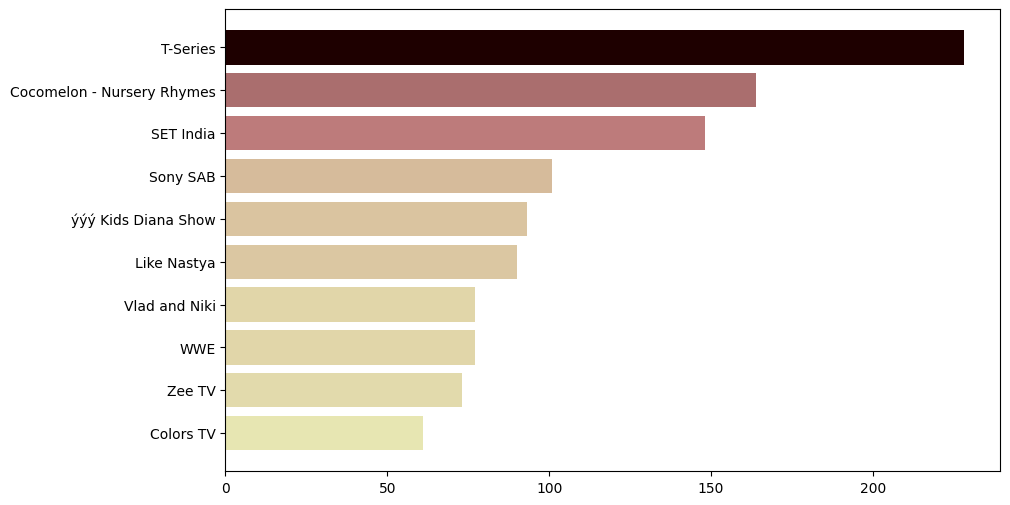

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
top_10_views = top_10_views.sort_values(by='Video Views (billion)')
colors = plt.cm.get_cmap('pink_r')(top_10_views['Video Views (billion)'] / max(top_10_views['Video Views (billion)']))
#Color based on values

ax.barh(top_10_views['Youtuber'] , top_10_views['Video Views (billion)'], color=colors)


<ipython-input-47-5950a7417474>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('pink_r')(top_10_subs['subscribers (million)'] / max(top_10_subs['subscribers (million)']))


<BarContainer object of 10 artists>

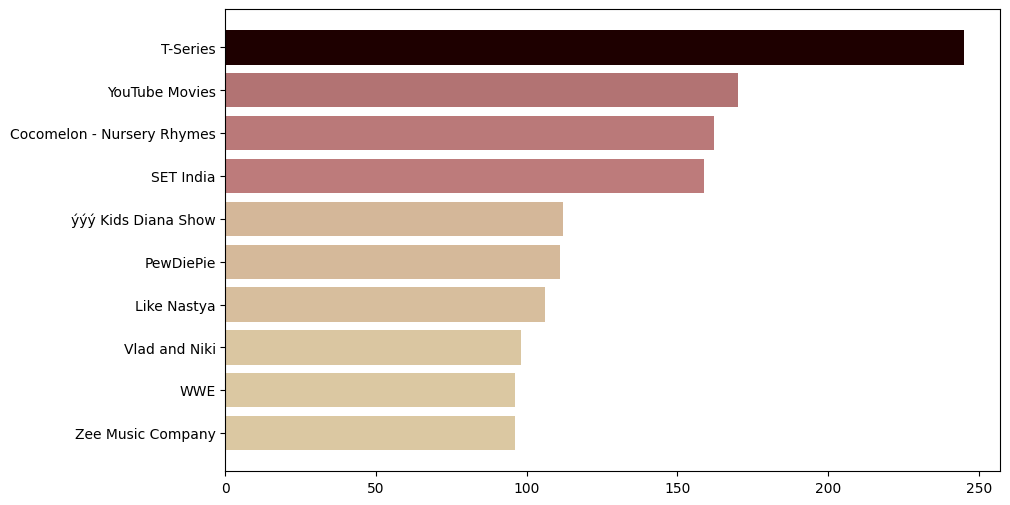

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
top_10_subs = top_10_subs.sort_values(by='subscribers (million)')
colors = plt.cm.get_cmap('pink_r')(top_10_subs['subscribers (million)'] / max(top_10_subs['subscribers (million)']))
#Color based on values

ax.barh(top_10_subs['Youtuber'] , top_10_subs['subscribers (million)'], color=colors)

## Is there a correlation between the number of subscribers and views? Let's delve deeper into the relationship between these two avriables

In [48]:
correlation = youtube[['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'created_year']].corr()
correlation

,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,created_year
subscribers,1.0,0.8,0.1,0.4,0.4,-0.1
video views,0.8,1.0,0.2,0.6,0.6,-0.1
uploads,0.1,0.2,1.0,0.2,0.2,-0.2
lowest_monthly_earnings,0.4,0.6,0.2,1.0,1.0,0.1
highest_monthly_earnings,0.4,0.6,0.2,1.0,1.0,0.1
created_year,-0.1,-0.1,-0.2,0.1,0.1,1.0


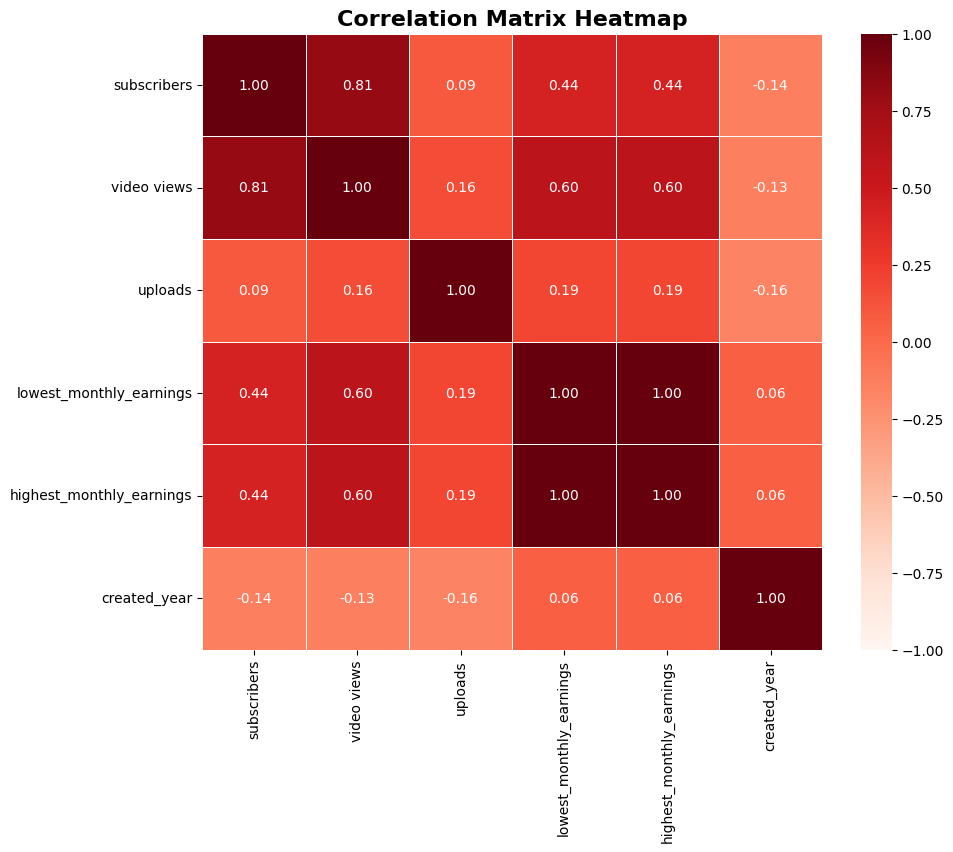

In [49]:
plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot= True,
           cmap= 'Reds',
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )
plt.show()


# Does uploading more videos on a YouTube channel lead to an increase in subscribers and views?

In [50]:
comp = youtube[['Youtuber', 'category', 'uploads','video views','subscribers']].sort_values(by= 'uploads',
             ascending= False).reset_index(drop= True)
comp['views in billions']= comp['video views']/1000000000
comp['subs in million']=comp['subscribers']/1000000
comp['uploads in K']=comp['uploads']/1000
comp.drop(columns=['uploads','video views','subscribers'], inplace=True)
comp

,Youtuber,category,views in billions,subs in million,uploads in K
0,ABP NEWS,People & Blogs,13.1,37.0,301.3
1,GMA Integrated News,News & Politics,9.6,13.4,296.3
2,TV9 Bharatvarsh,People & Blogs,10.3,14.5,293.5
3,Aaj Tak,News & Politics,25.3,57.6,283.8
4,IndiaTV,News & Politics,16.1,35.5,273.3
...,...,...,...,...,...
937,Crazy Frog,Music,7.9,14.2,0.0
938,Masha e o Urso,Shows,8.3,18.9,0.0
939,Luisito Comunica,Comedy,8.7,40.6,0.0
940,Fede Vigevani,Howto & Style,8.0,25.6,0.0


<Axes: xlabel='subs in million', ylabel='uploads in K'>

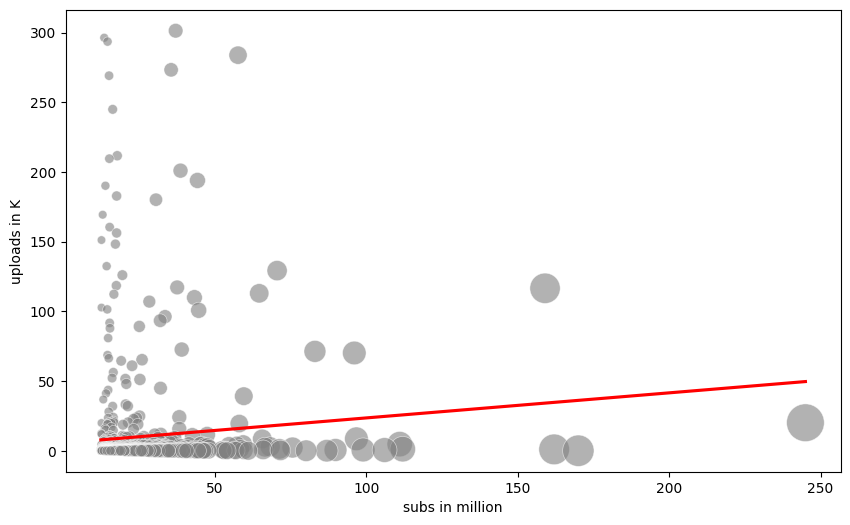

In [51]:
cor1=comp['uploads in K'].corr(comp['subs in million'])
plt.figure(figsize= (10,6))
s1 = comp['subs in million'] * 3
sns.scatterplot(data= comp, x='subs in million', y='uploads in K',
               color = 'gray',s = s1, alpha=0.6)
sns.regplot(data= comp,  x='subs in million', y='uploads in K',
           scatter=False, ci=None,line_kws={"color": "red"})

### Uploads & Video Views

<Axes: xlabel='views in billions', ylabel='uploads in K'>

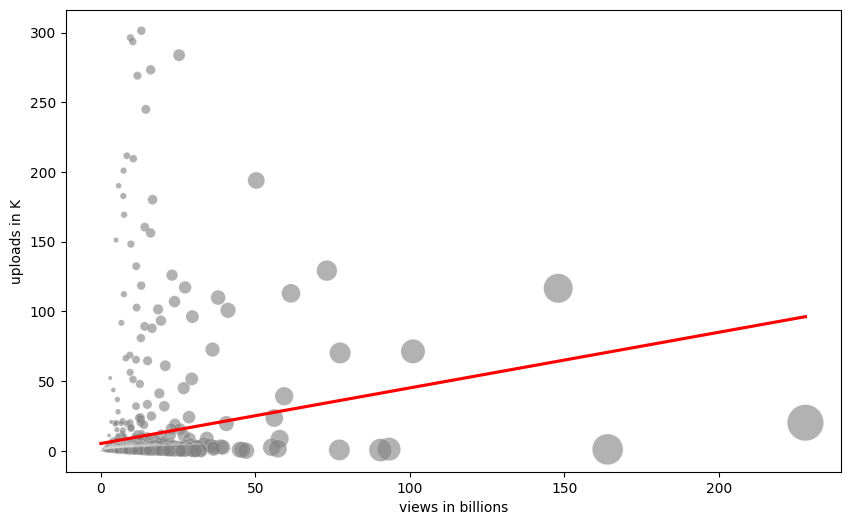

In [52]:
cor1=comp['uploads in K'].corr(comp['views in billions'])
plt.figure(figsize= (10,6))
s1 = comp['views in billions'] * 3
sns.scatterplot(data= comp, x='views in billions', y='uploads in K',
               color = 'gray',s = s1, alpha=0.6)
sns.regplot(data= comp,  x='views in billions', y='uploads in K',
           scatter=False, ci=None,line_kws={"color": "red"})

# Which types of YouTube channels have the highest number of uploaded videos?¶

In [53]:
catgrp= youtube.groupby('category').agg({'category' : 'count',
                                                   'uploads' : 'sum',
                                                   'subscribers' : 'sum',
                                                   'video views' : 'sum'
                                                }).rename(columns={'category': 'catcount'})

catgrp

,catcount,uploads,subscribers,video views
category,,,,
Autos & Vehicles,2,3797,35700000,15003458141.0
Comedy,69,77263,1388500000,550112774315.0
Education,45,141429,1194400000,696614472899.0
Entertainment,239,2869203,4973900000,2490572423035.0
Film & Animation,46,128784,1314900000,544422509313.0
Gaming,93,405461,1942500000,713886552367.0
Howto & Style,40,66934,775600000,201817545540.0
Movies,2,7106,51300000,15383255129.0
Music,200,471773,5155300000,3103516219048.0


In [54]:
catgrp=catgrp.sort_values(by='uploads', ascending=False)
catgrp

,catcount,uploads,subscribers,video views
category,,,,
News & Politics,25,2923850,500100000,267381134412.0
Entertainment,239,2869203,4973900000,2490572423035.0
People & Blogs,131,1213183,2765000000,1260101977096.0
Music,200,471773,5155300000,3103516219048.0
Gaming,93,405461,1942500000,713886552367.0
Shows,13,356768,541000000,446206826909.0
Nonprofits & Activism,2,205824,55500000,10862911785.0
Sports,11,159431,298200000,147986290620.0
Education,45,141429,1194400000,696614472899.0


([<matplotlib.patches.Wedge at 0x78295d6cdc00>,
 [Text(-0.9740421786350355, 0.5111182194364761, 'News & Politics'),
  Text(0.11062876556303154, -1.0944228050575335, 'Entertainment'),
  Text(1.0987103718686546, 0.05324958918379453, 'People & Blogs'),
  Text(0.8586656130312751, 0.6875269921956699, 'Music'),
  Text(0.5929819335565055, 0.9264839051357494, 'Gaming'),
  Text(0.3101382701291787, 1.0553739874571861, 'Shows'),
  Text(0.08413174821099079, 1.0967779396682642, 'Nonprofits & Activism')],
 [Text(-0.7615238851146641, 0.3996015170139722, '35%'),
  Text(0.0864915803492792, -0.8556396475904352, '34%'),
  Text(0.8589917452791299, 0.041631496998239356, '14%'),
  Text(0.6713203883699059, 0.5375211029893419, '6%'),
  Text(0.46360405714417696, 0.7243419621970404, '5%'),
  Text(0.2424717384646306, 0.8251105720119818, '4%'),
  Text(0.06577573041950188, 0.8574809346497339, '2%')])

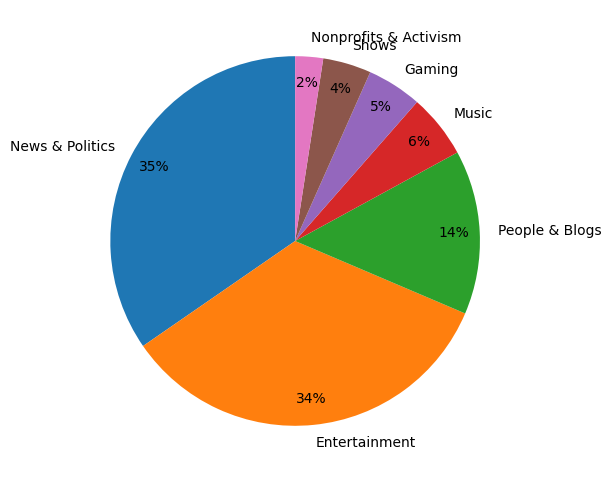

In [55]:
labels = catgrp.index[:7]
sizes = catgrp['uploads'][:7]
plt.figure(figsize= (9,6))
plt.pie(sizes, labels= labels,
        autopct='%1.0f%%',
        startangle=90,
        pctdistance=0.86)


# Does the content (characters) in the names of YouTube channels influence user views?

In [56]:
!pip install wordcloud
from wordcloud import WordCloud

In [57]:
hviews = youtube[youtube['video views'] > youtube['video views'].quantile(0.75)]

#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'
import re
#Youtuber feature
hviews['Youtuber'] = hviews['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
hviews['Youtuber'] = hviews['Youtuber'].str.strip()
hviews['Youtuber'] = hviews['Youtuber'].str.lstrip('- ')


<ipython-input-57-8b3eaaf4361f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hviews['Youtuber'] = hviews['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
<ipython-input-57-8b3eaaf4361f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hviews['Youtuber'] = hviews['Youtuber'].str.strip()
<ipython-input-57-8b3eaaf4361f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

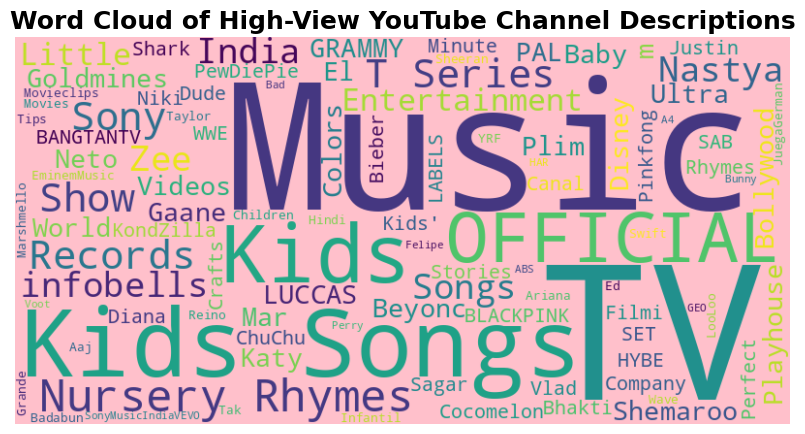

In [58]:
# Filter channels with views above the 75th percentile
#hviews = youtube[youtube['video views'] > youtube['video views'].quantile(0.75)]

# Combine the names of high-view channels into a single string
words = ' '.join(hviews['Youtuber'])

# Create the word cloud
wordcloud = WordCloud(background_color = 'pink', width = 800, height = 400, max_words= 100).generate(words)
plt.figure(figsize= (10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of High-View YouTube Channel Descriptions', fontsize = 18, fontweight = 'heavy')
plt.show()

#  Is it true that higher views result in higher channel revenue?

In [59]:
views_earnings = youtube[['Youtuber', 'video views', 'lowest_monthly_earnings', 'highest_monthly_earnings']]

#Add column Avg for Earnings
views_earnings['Average Monthly Earnings'] = (views_earnings['lowest_monthly_earnings'] + views_earnings['highest_monthly_earnings'])/2

#Change the unit of Earnings (1000$)
views_earnings['Average Monthly Earnings (1000$)'] = (views_earnings['Average Monthly Earnings'] /1000).astype('int')

#Change the unit of Video Views (billion)
views_earnings['Video Views (billion)'] = (views_earnings['video views'] /1000000000).astype('int')

#Select final column
views_earnings = views_earnings[['Youtuber', 'Video Views (billion)', 'Average Monthly Earnings (1000$)']]

#Show statistics table
views_earnings.head()

<ipython-input-59-e5c478dfbd04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views_earnings['Average Monthly Earnings'] = (views_earnings['lowest_monthly_earnings'] + views_earnings['highest_monthly_earnings'])/2
<ipython-input-59-e5c478dfbd04>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views_earnings['Average Monthly Earnings (1000$)'] = (views_earnings['Average Monthly Earnings'] /1000).astype('int')
<ipython-input-59-e5c478dfbd04>:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,Youtuber,Video Views (billion),Average Monthly Earnings (1000$)
0,T-Series,228,4782
1,YouTube Movies,0,0
2,Cocomelon - Nursery Rhymes,164,4196
3,SET India,148,3877
4,ýýý Kids Diana Show,93,1541


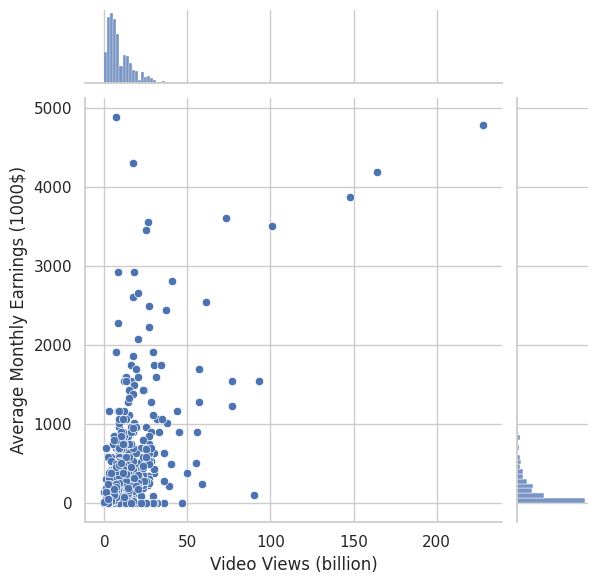

In [60]:
sns.set(style="whitegrid")
sns.jointplot(x='Video Views (billion)', y='Average Monthly Earnings (1000$)', data=views_earnings, kind='scatter')
plt.show()

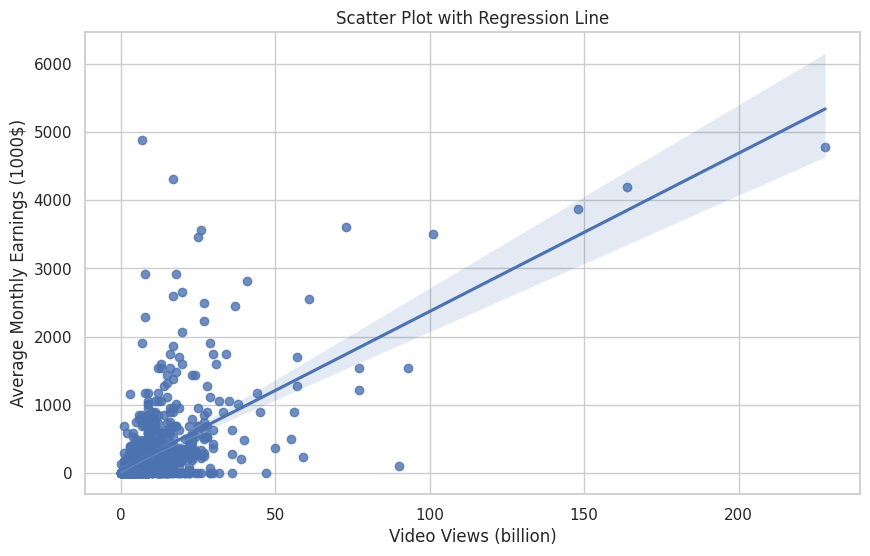

In [61]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Video Views (billion)', y='Average Monthly Earnings (1000$)', data=views_earnings)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Video Views (billion)')
plt.ylabel('Average Monthly Earnings (1000$)')
plt.show()

Although there is a positive correlation, it's not excessively strong. This indicates that high views alone don't guarantee correspondingly high income. Other factors, such as video duration, user interaction, or ad placement, may influence channel revenue.
Video quality may be more important than absolute quantity (e.g., viewer retention rate, ad click-through rate, etc.). Channels focusing on creating engaging, high-quality content to attract loyal users may generate higher average monthly income even with fewer views.
This correlation somewhat reinforces the earlier point that successful YouTube channels can have diverse revenue sources, including merchandise sales, sponsored content, affiliate marketing, and fan contributions. This makes them less reliant on traditional advertising revenue or user view income.